# Random N cut generator with diagram

Estimate: 9.333
Intersections: 4
Pieces: 10

Run time: 0.0887598991394043 sec


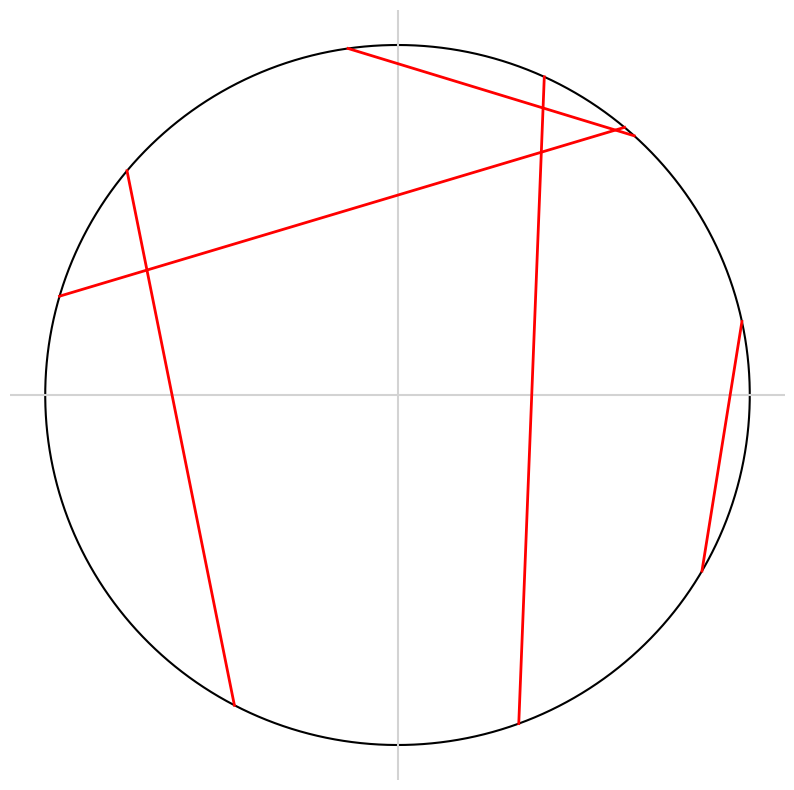

In [3]:
import random as rand
from numpy import cos, sin, pi, linspace, mean
import time
import matplotlib.pyplot as plt
import pandas as pd


# Function used to draw the cut given two points on the cake
def draw_cut(two_random_angles):
    [angle1, angle2] = two_random_angles
    plt.plot([cos(angle1 + pi/2), cos(angle2 + pi/2)], [sin(angle1 + pi/2), sin(angle2 + pi/2)], linewidth=2, color='red') # +pi/2 added so that theta=0 is along the y-axis
    

def draw_cake(theta_list): 
    plt.figure(figsize=(10, 10), dpi=100)
    plt.plot(sin(theta_list), cos(theta_list), "k")
    plt.axvline(color='lightgray')
    plt.axhline(color='lightgray')
    plt.axis('off')

    
def main(num_cuts):
    theta_list = linspace(0, 2*pi, 1000000)
    draw_cake(theta_list)
    
    # Randomly generate two points on cake, plot them, and save them to a list in ASCENDING order (for the upcoming XOR operation...)
    cake_pieces = []
    for cut in range(num_cuts):
        pts_on_cake = [rand.choice(theta_list), rand.choice(theta_list)]
        draw_cut(pts_on_cake)
        cake_pieces.append([min(pts_on_cake), max(pts_on_cake)])
    
    #intersection counting by iterating over all cuts
    total_intersections = 0
    for i in range(num_cuts):
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
        
    # The best estimator according to theory
    estimator = 0.16666 * num_cuts ** 2 + 0.8333 * num_cuts + 1
    print(f"Estimate: {estimator}")
    
    print(f"Intersections: {total_intersections}")
    print(f"Pieces: {total_intersections + num_cuts + 1}\n")


start = time.time()

main(num_cuts = 5)  # Change to the number of cuts you want

end = time.time()
print(f"Run time: {end - start} sec")

# Simulating 100 cakes for cuts ranging from 1 to 30

<P(n)> = 0.16716180857518473*n^2 + 0.8052384846799442n + 1.0986840175953425 

Run time: 0.2593061923980713 sec


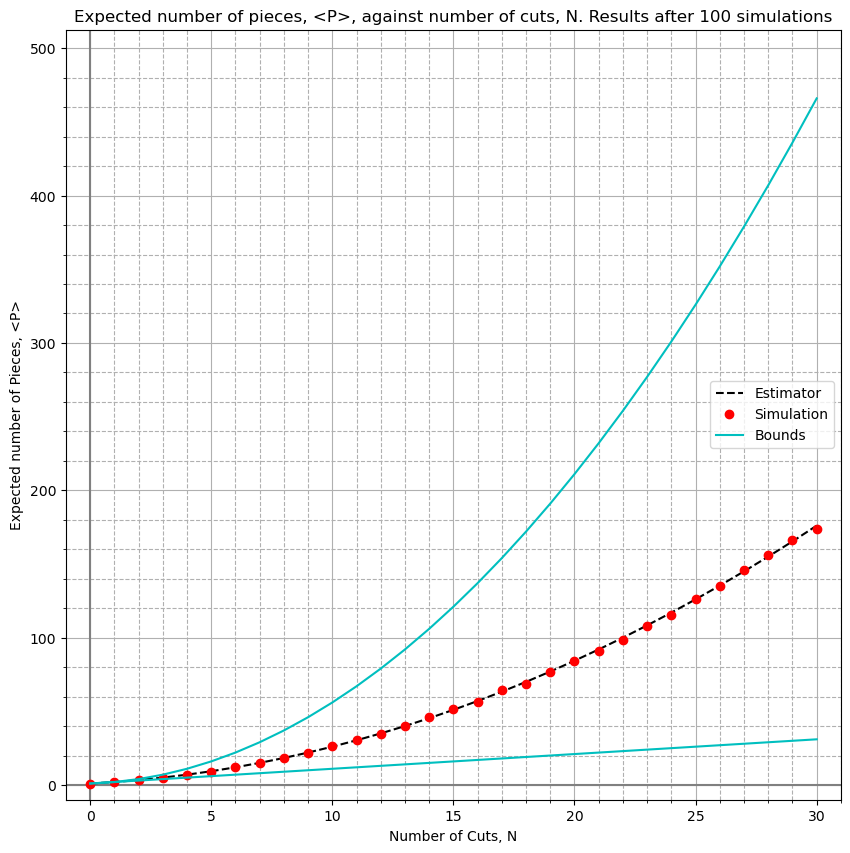

In [12]:
import random as rand
from numpy import cos, sin, pi, linspace, mean, polyfit
import time
import matplotlib.pyplot as plt
import pandas as pd


def count_pieces(cuts, theta_list):
    # Randomly generate two points on cake and save the to a list in ascending order
    cake_pieces = []
    for cut in range(cuts):
        pts_on_cake = [rand.choice(theta_list), rand.choice(theta_list)]
        cake_pieces.append([min(pts_on_cake),max(pts_on_cake)])
    
    #intersection counting by iterating over all cuts
    total_intersections = 0
    for i in range(cuts):
        for j in range(cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
    return total_intersections + cuts + 1


def plot(cut_list, simulation_means, num_sim):
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axvline(color='gray')
    plt.axhline(color='gray')
    plt.xlim(-1, max(cut_list) + 1)
    plt.ylim(-10, 1.1*max(0.5 * (cut_list **2 + cut_list + 2)))
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-')
    plt.grid(which='minor', linestyle='--')
    plt.title(f'Expected number of pieces, <P>, against number of cuts, N. Results after {num_sim} simulations')
    plt.xlabel('Number of Cuts, N')
    plt.ylabel('Expected number of Pieces, <P>')
    
    estimator = [(n**2)/6 + 5*n/6 + 1  for n in cut_list]
    plt.plot(cut_list, estimator, 'k', linestyle='dashed',linewidth=1.5,  label='Estimator')
    plt.plot(cut_list, simulation_means, 'ro',  label='Simulation')
    plt.plot(cut_list, cut_list + 1, 'c', label='Bounds')
    plt.plot(cut_list, 0.5 * (cut_list **2 + cut_list + 2), 'c')
    plt.legend()
    
    [a, b, c] = polyfit(cut_list, simulation_means, 2, cov=False)
    print(f"<P(n)> = {a}*n^2 + {b}n + {c} \n")


def main(num_pieces, num_loops):
    cut_list = linspace(0, num_pieces, num_pieces + 1)
    theta_list = linspace(0, 2*pi, 1000000)

    simulation_means = []
    for cut in cut_list: # Obtain average number of pieces for each number of cuts
        num_pieces_list = []
        for i in range(num_loops):
            resnum_pieces_listults.append(count_pieces(int(cut), theta_list))
        simulation_means.append(mean(num_pieces_list))

    plot(cut_list, simulation_means, num_loops)


start = time.time()

main(num_pieces = 30, num_loops = 100)  # Change parameters here

end = time.time()
print(f"Run time: {end - start} sec")